In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from dpp.data import load_from_kaggle


In [5]:
dataset_link = "jainaru/world-happiness-report-2024-yearly-updated" # World Happiness Report 2024
destination = "../data/raw"
dataset_name = dataset_link.split("/")[-1]

files = load_from_kaggle(
    dataset_link=dataset_link, 
    destination=destination,
    )

Destination directory '../data/raw/world-happiness-report-2024-yearly-updated' already exists with files. Skipping download (replace=False).


In [6]:
files

['World-happiness-report-2024.csv', 'World-happiness-report-updated_2024.csv']

Exploration: Historical Data 2005 - 2023

In [7]:
df_all_years = pd.read_csv("/".join(["../data/raw/", dataset_name, files[1]]), encoding='latin1')
print('Data 2005-2023:')
display(df_all_years.head())

Data 2005-2023:


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.164,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.187,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.118,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.160,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.234,0.776,0.614,0.268


In [8]:
print('Data 2005-2023:')
display(
    "Shape",
    df_all_years.shape,
    "Description",
    df_all_years.describe().round(2),
    "Duplicates",
    df_all_years.duplicated().sum(),
)


pd.DataFrame(
    {
        "Data Types": df_all_years.dtypes,
        "Missing Values": df_all_years.isnull().sum(),
        "Unique Values": df_all_years.nunique(),
        "Sample Values": [df_all_years[col].sample(3).tolist() for col in df_all_years.columns]
    })


Data 2005-2023:


'Shape'

(2363, 11)

'Description'

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,2363.00,2363.00,2335.00,2350.00,2300.00,2327.00,2282.00,2238.00,2339.00,2347.00
mean,2014.76,5.48,9.40,0.81,63.40,0.75,0.00,0.74,0.65,0.27
std,5.06,1.13,1.15,0.12,6.84,0.14,0.16,0.18,0.11,0.09
min,2005.00,1.28,5.53,0.23,6.72,0.23,-0.34,0.04,0.18,0.08
25%,2011.00,4.65,8.51,0.74,59.20,0.66,-0.11,0.69,0.57,0.21
50%,2015.00,5.45,9.50,0.83,65.10,0.77,-0.02,0.80,0.66,0.26
75%,2019.00,6.32,10.39,0.90,68.55,0.86,0.09,0.87,0.74,0.33
max,2023.00,8.02,11.68,0.99,74.60,0.98,0.70,0.98,0.88,0.70


'Duplicates'

np.int64(0)

,Data Types,Missing Values,Unique Values,Sample Values
Country name,object,0,165,"[Iran, Denmark, Taiwan Province of China]"
year,int64,0,19,"[2014, 2012, 2005]"
Life Ladder,float64,0,1814,"[4.313, 5.325, 5.125]"
Log GDP per capita,float64,28,1760,"[10.041, 8.123, 10.385]"
Social support,float64,13,484,"[0.753, 0.825, 0.812]"
Healthy life expectancy at birth,float64,63,1126,"[62.44, 63.85, 63.875]"
Freedom to make life choices,float64,36,550,"[0.792, 0.851, 0.738]"
Generosity,float64,81,650,"[0.082, 0.064, -0.054]"
Perceptions of corruption,float64,125,613,"[0.775, nan, 0.829]"
Positive affect,float64,24,442,"[0.496, 0.689, 0.436]"


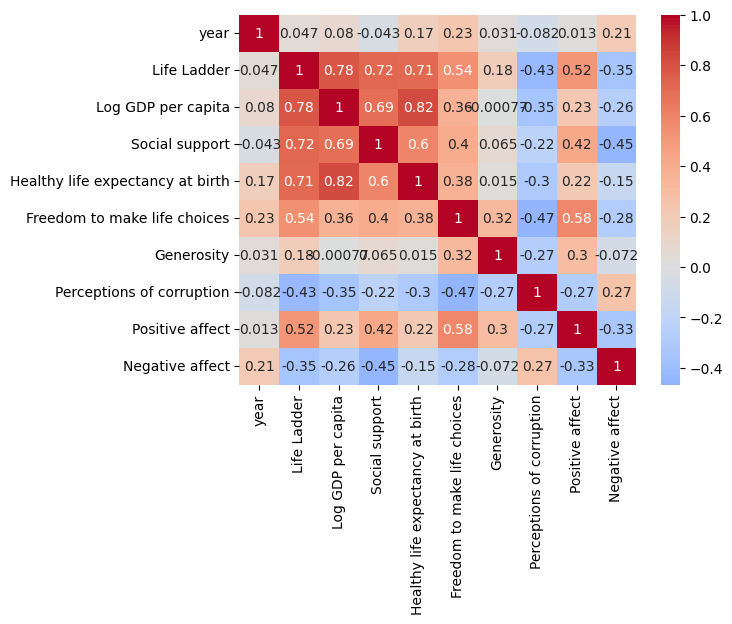

In [9]:
sns.heatmap(df_all_years.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0);

Distribution of Numerical Features:


array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'Life Ladder'}>,
        <Axes: title={'center': 'Log GDP per capita'}>],
       [<Axes: title={'center': 'Social support'}>,
        <Axes: title={'center': 'Healthy life expectancy at birth'}>,
        <Axes: title={'center': 'Freedom to make life choices'}>],
       [<Axes: title={'center': 'Generosity'}>,
        <Axes: title={'center': 'Perceptions of corruption'}>,
        <Axes: title={'center': 'Positive affect'}>],
       [<Axes: title={'center': 'Negative affect'}>, <Axes: >, <Axes: >]],
      dtype=object)

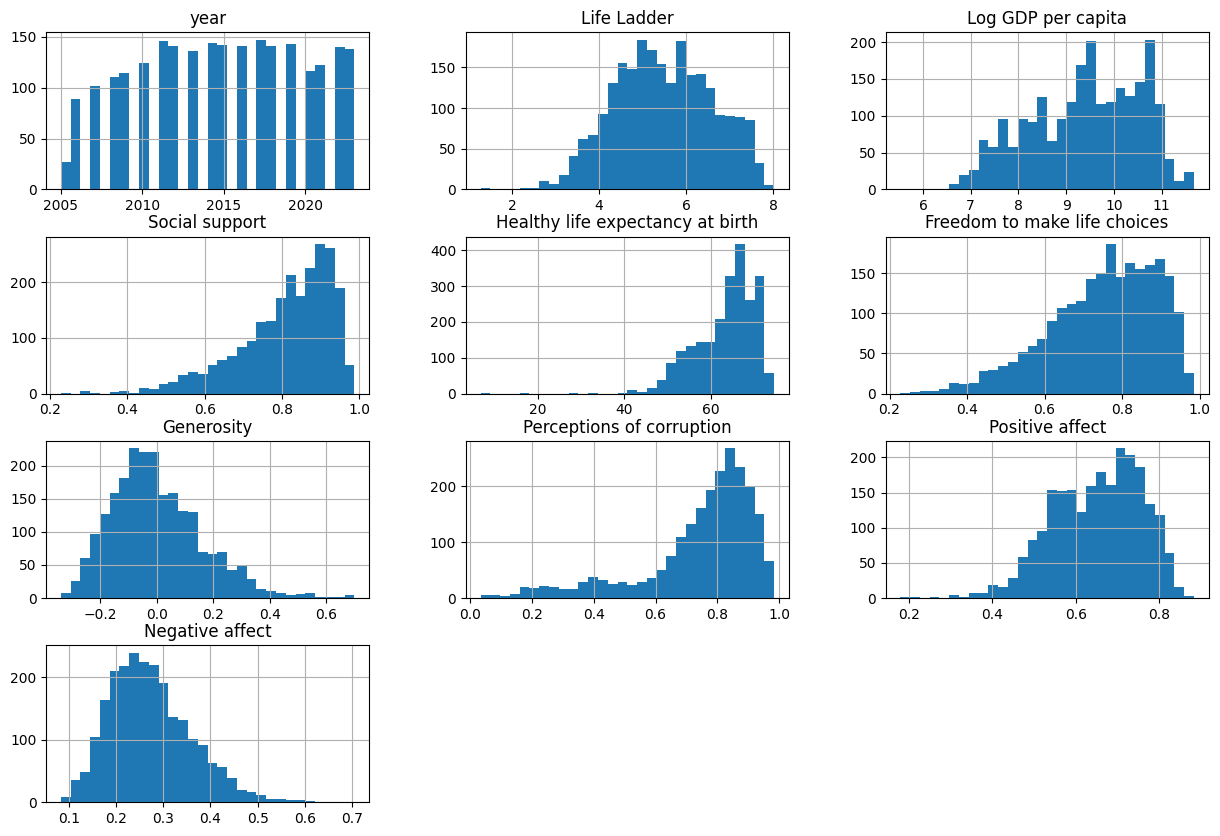

In [13]:
print('Distribution of Numerical Features:')
df_all_years.hist(figsize=(15, 10), bins=30)

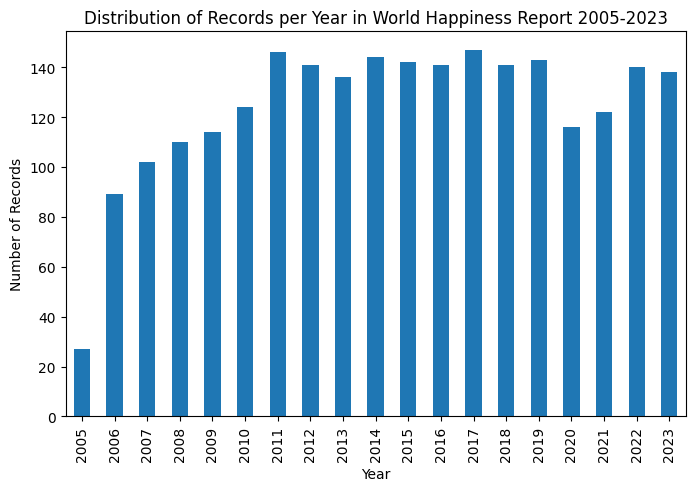

In [45]:
# Distribution of Records per Year
plt.figure(figsize=(8,5))
df_all_years['year'].value_counts().sort_index().plot(kind="bar")
plt.title('Distribution of Records per Year in World Happiness Report 2005-2023')
plt.xlabel('Year')
plt.ylabel('Number of Records')
plt.show()


Exploration: Current Data 2024

In [10]:
df_2024 = pd.read_csv("/".join(["../data/raw/", dataset_name, files[0]]))
print('Data 2024:')
display(df_2024.head())

Data 2024:


,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298


In [11]:
print('Data 2024:')
display(
    "Shape",
    df_2024.shape,
    "Description",
    df_2024.describe().round(2),
    "Duplicates",
    df_2024.duplicated().sum(),
)


pd.DataFrame(
    {
        "Data Types": df_2024.dtypes,
        "Missing Values": df_2024.isnull().sum(),
        "Unique Values": df_2024.nunique(),
        "Sample Values": [df_2024[col].sample(3).tolist() for col in df_2024.columns]
    })


Data 2024:


'Shape'

(143, 12)

'Description'

,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
count,143.00,143.00,143.00,140.00,140.00,140.00,140.00,140.00,140.00,140.00
mean,5.53,5.64,5.41,1.38,1.13,0.52,0.62,0.15,0.15,1.58
std,1.17,1.16,1.19,0.43,0.33,0.16,0.16,0.07,0.13,0.54
min,1.72,1.78,1.67,0.00,0.00,0.00,0.00,0.00,0.00,-0.07
25%,4.73,4.85,4.61,1.08,0.92,0.40,0.53,0.09,0.07,1.31
50%,5.78,5.90,5.67,1.43,1.24,0.55,0.64,0.14,0.12,1.64
75%,6.42,6.51,6.32,1.74,1.38,0.65,0.74,0.19,0.19,1.88
max,7.74,7.82,7.67,2.14,1.62,0.86,0.86,0.40,0.57,3.00


'Duplicates'

np.int64(0)

,Data Types,Missing Values,Unique Values,Sample Values
Country name,object,0,143,"[New Zealand, Comoros, Montenegro]"
Regional indicator,object,0,10,"[Latin America and Caribbean, Sub-Saharan Afri..."
Ladder score,float64,0,140,"[6.188, 6.523, 5.959]"
upperwhisker,float64,0,140,"[7.051, 4.123, 4.446]"
lowerwhisker,float64,0,136,"[3.985, 4.313, 5.466]"
Log GDP per capita,float64,3,134,"[1.517, 1.361, 1.7]"
Social support,float64,3,124,"[1.381, 0.969, 1.277]"
Healthy life expectancy,float64,3,119,"[0.718, 0.262, 0.708]"
Freedom to make life choices,float64,3,122,"[0.827, 0.709, 0.816]"
Generosity,float64,3,110,"[0.144, 0.145, 0.175]"


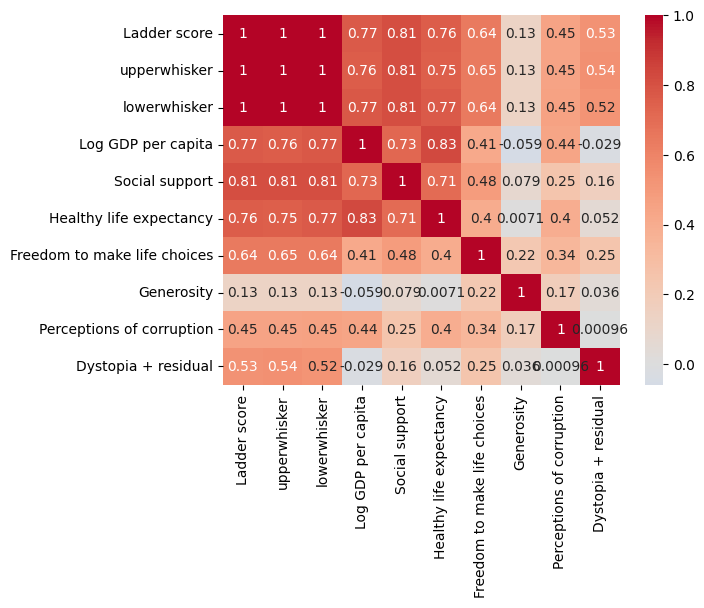

In [12]:
sns.heatmap(df_2024.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0);

Distribution of Numerical Features:


array([[<Axes: title={'center': 'Ladder score'}>,
        <Axes: title={'center': 'upperwhisker'}>,
        <Axes: title={'center': 'lowerwhisker'}>],
       [<Axes: title={'center': 'Log GDP per capita'}>,
        <Axes: title={'center': 'Social support'}>,
        <Axes: title={'center': 'Healthy life expectancy'}>],
       [<Axes: title={'center': 'Freedom to make life choices'}>,
        <Axes: title={'center': 'Generosity'}>,
        <Axes: title={'center': 'Perceptions of corruption'}>],
       [<Axes: title={'center': 'Dystopia + residual'}>, <Axes: >,
        <Axes: >]], dtype=object)

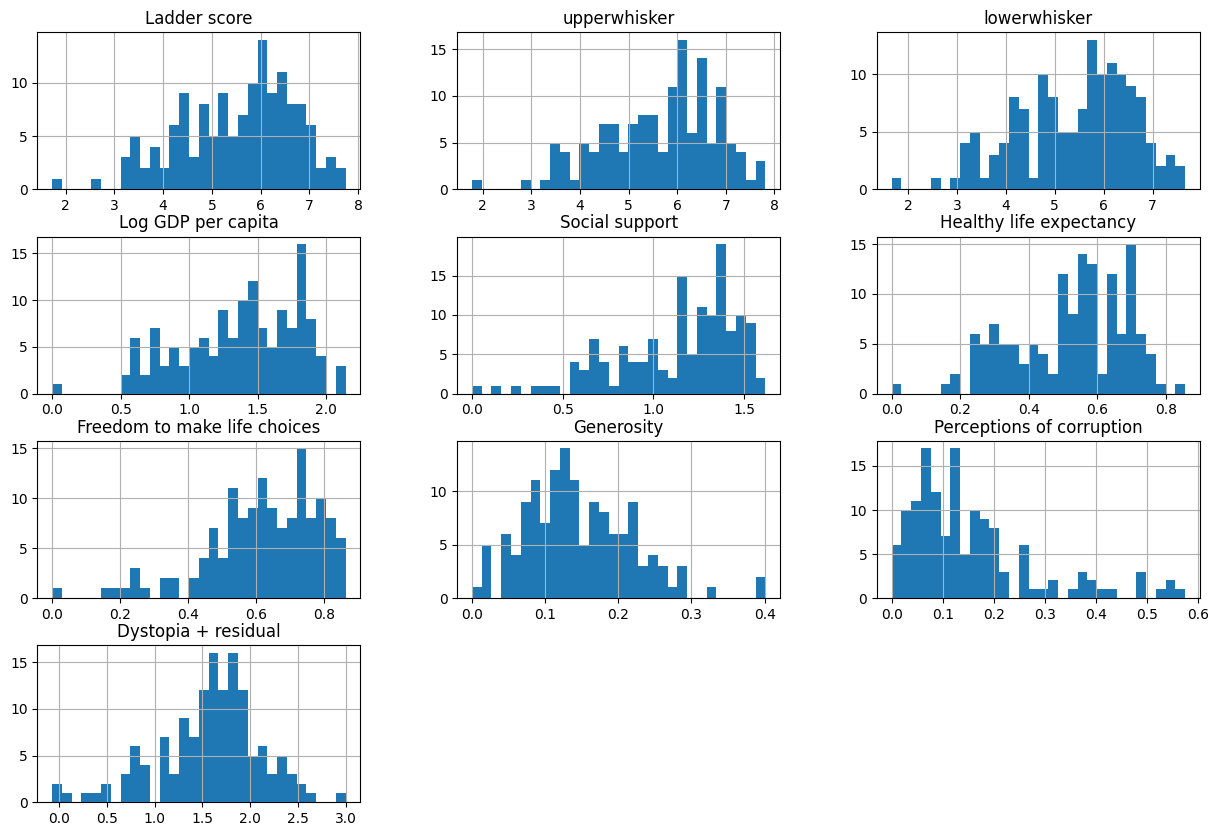

In [49]:
# Distribution of Numerical columns

print('Distribution of Numerical Features:')
df_2024.hist(figsize=(15, 10), bins=30)

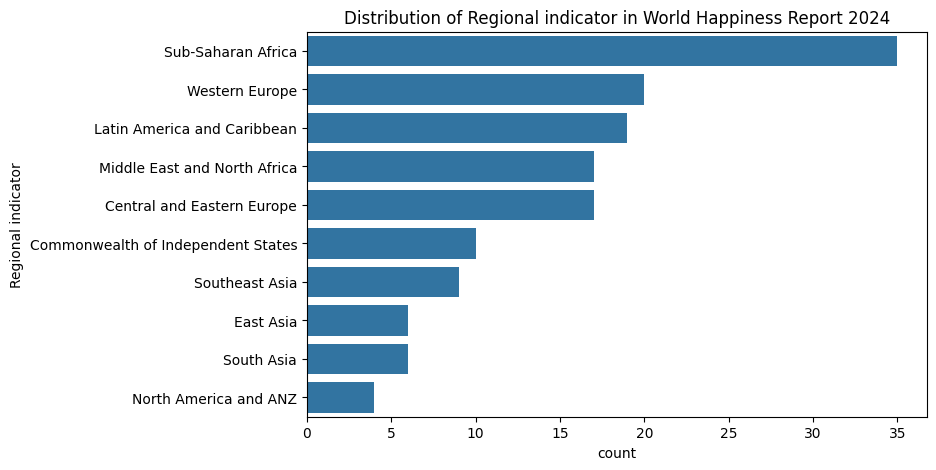

In [42]:
# Distribution of Regional indicator

plt.figure(figsize=(8,5))
order = df_2024['Regional indicator'].value_counts().index
sns.countplot(y=df_2024['Regional indicator'], order=order)
plt.title('Distribution of Regional indicator in World Happiness Report 2024')
plt.show()


In [57]:
# Regional indicator statistics
df_2024.groupby('Regional indicator')['Ladder score'].agg(['count','mean','std']).sort_values('mean', ascending=False)


,count,mean,std
Regional indicator,,,
North America and ANZ,4,6.927750,0.151476
Western Europe,20,6.841650,0.538030
Central and Eastern Europe,17,6.170941,0.494803
Latin America and Caribbean,19,6.143368,0.376936
East Asia,6,5.934333,0.398773
Southeast Asia,9,5.551889,0.779519
Commonwealth of Independent States,10,5.538500,0.480649
Middle East and North Africa,17,5.199941,1.260354
Sub-Saharan Africa,35,4.329686,0.704075


## Initial Findings

- Both datasets (2005–2023 and 2024) contain happiness scores ("Ladder score") and several explanatory variables such as GDP, social support, and health.
- The datasets differ slightly in structure:
  - 2005–2023: yearly panel data, no regional indicator included.
  - 2024: single year, includes a regional indicator, some variable definitions slightly differ (e.g., perceptions of corruption).
- Missing values are present in both datasets, especially in 2024 for health, social support, and corruption perception.
- No duplicate entries were detected.
- Key correlations (consistent across datasets):
  - Ladder score strongly correlates with Log GDP per capita, Social support, and Healthy life expectancy.
  - Perceptions of corruption correlates with ladder score, but the sign of correlation differs between 2005–2023 and 2024, likely due to different variable scaling/definitions.
  - Generosity shows weak correlation with ladder score in both datasets.
- The 2024 dataset introduces explicit regional grouping, which supports comparative regional analyses and systematic testing of regional differences.

### Preliminary Assumptions
- Economic factors (GDP), social support, and health are the strongest predictors of happiness.
- The role of corruption perception needs clarification due to potential differences in definition/scaling.
- Generosity may not be a strong explanatory factor for happiness.
- Differences in definitions across datasets must be clarified before merging or comparing results.
- The inclusion of regional indicators in 2024 opens up the possibility of analyzing systematic regional differences in happiness levels.

These initial findings motivate the next step of systematically preprocessing the datasets (handling missing values, clarifying definitions, and preparing variables) before deeper analysis and hypothesis testing.